In [17]:
print("JS")

JS


In [18]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
print("Tensorlow imported")

Tensorlow imported


In [19]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

print("Import of Tensoflow modules - done")

Import of Tensoflow modules - done


In [28]:
import time 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Import of additional packages - done")

Import of additional packages - done


In [21]:
np.random.seed(1432)
print("Configure the seed value - done")

Configure the seed value - done


In [22]:
print("Working on the MNIST database")

from tensorflow.keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))

num_input_nodes = img_rows*img_cols

print("Train labels : ", train_labels)
print("Test labels : ", test_labels)

print("Number of rows : ", img_rows, " Number of Cols : ", img_cols)
print("Number of classes : ", num_classes)
print("Data of the DB : \n", train_features)
print("Shape of the db : ", train_features.shape)
print("Shape of the db [0] : ", train_features.shape[0])
print("Shape of the db [1] : ", train_features.shape[1])
print("Shape of the db [2] : ", train_features.shape[2])
print("Type of the db : ", type(train_features))



print("Data of the DB : \n", test_features)
print("Shape of the db : ", test_features.shape)
print("Shape of the db [0] : ", test_features.shape[0])
print("Shape of the db [1] : ", test_features.shape[1])
print("Shape of the db [2] : ", test_features.shape[2])
print("Type of the db : ", type(test_features))



print("MNIST db - task done")

Working on the MNIST database
Train labels :  [5 0 4 ... 5 6 8]
Test labels :  [7 2 1 ... 4 5 6]
Number of rows :  28  Number of Cols :  28
Number of classes :  10
Data of the DB : 
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Shape of the db :  (60000, 28, 28)
Shape of

Sample data : 


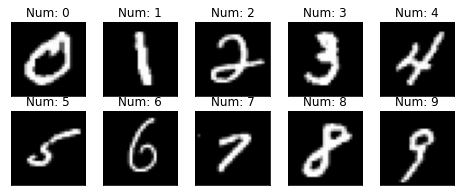

In [23]:
print("Sample data : ")
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(features_idx[1], cmap="gray")
plt.show()

In [24]:
print("Preprocessing start")

print("Reshape images to columns vectors")
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols)


print("\ntrain_lables : ", train_labels[0:1])
print("Convert class labels to binary labels")
train_labels = to_categorical(train_labels, num_classes)
print("\n New train_lables : ", train_labels[0:1])


print("\ntest_lables : ", test_labels[0:1])
print("Convert class labels to binary labels")
test_labels = to_categorical(test_labels, num_classes)
print("\n New train_lables : ", train_labels[0:1])

# train_labels = to_categorical(train_labels, num_classes)
# test_labels = to_categorical(test_labels, num_classes)

print("Preprocessing end")

Preprocessing start
Reshape images to columns vectors

train_lables :  [5]
Convert class labels to binary labels

 New train_lables :  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

test_lables :  [7]
Convert class labels to binary labels

 New train_lables :  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Preprocessing end


In [25]:
# print("start - Defining the NN model : ")

def simple_nn():
   model = Sequential()
   model.add(Dense(100, input_dim=num_input_nodes))
   model.add(Activation('sigmoid'))
   model.add(Dense(num_classes)) # output layer
   model.add(Activation('softmax'))
   return model

# print("end - Defining the NN model")

In [26]:
model = simple_nn()
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [43]:
print("Lets train the model")
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, epochs=10, verbose=2, validation_split=0.2)
end = time.time()
print("Total time in Seconds :  ", (end-start))

Lets train the model
Epoch 1/10
750/750 - 2s - loss: 0.0178 - accuracy: 0.9000 - val_loss: 0.0178 - val_accuracy: 0.8938
Epoch 2/10
750/750 - 2s - loss: 0.0176 - accuracy: 0.9017 - val_loss: 0.0177 - val_accuracy: 0.8947
Epoch 3/10
750/750 - 2s - loss: 0.0173 - accuracy: 0.9028 - val_loss: 0.0175 - val_accuracy: 0.8953
Epoch 4/10
750/750 - 2s - loss: 0.0171 - accuracy: 0.9039 - val_loss: 0.0173 - val_accuracy: 0.8957
Epoch 5/10
750/750 - 2s - loss: 0.0169 - accuracy: 0.9054 - val_loss: 0.0172 - val_accuracy: 0.8964
Epoch 6/10
750/750 - 2s - loss: 0.0167 - accuracy: 0.9062 - val_loss: 0.0171 - val_accuracy: 0.8955
Epoch 7/10
750/750 - 2s - loss: 0.0165 - accuracy: 0.9074 - val_loss: 0.0169 - val_accuracy: 0.8978
Epoch 8/10
750/750 - 2s - loss: 0.0164 - accuracy: 0.9083 - val_loss: 0.0168 - val_accuracy: 0.8983
Epoch 9/10
750/750 - 2s - loss: 0.0162 - accuracy: 0.9095 - val_loss: 0.0167 - val_accuracy: 0.8985
Epoch 10/10
750/750 - 2s - loss: 0.0160 - accuracy: 0.9103 - val_loss: 0.0165 -

KeyError: ignored

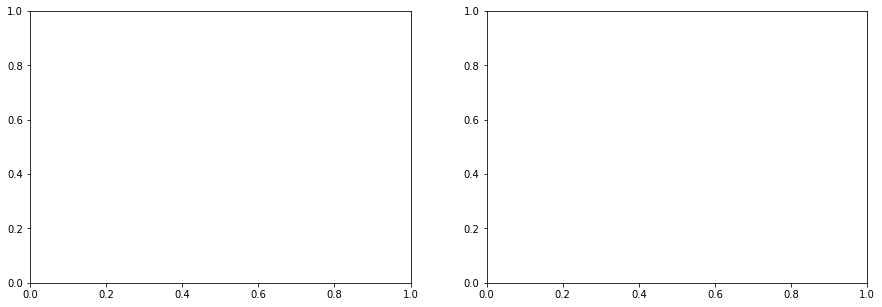

In [46]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(model_info)

In [ ]:
print("js - Original model testing")
